In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import numpy as np
np.seterr(over='ignore')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

# `Orion.cont.image.fits`

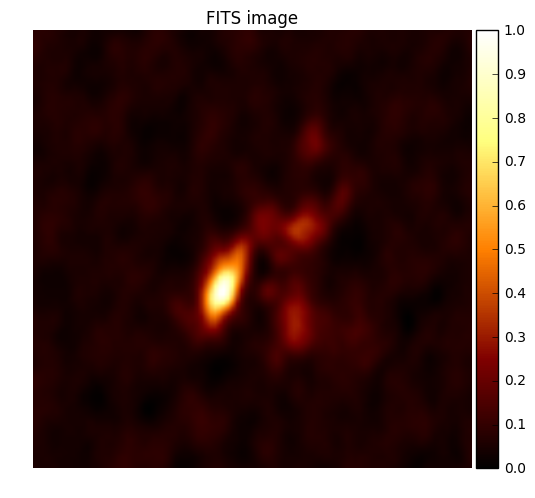

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

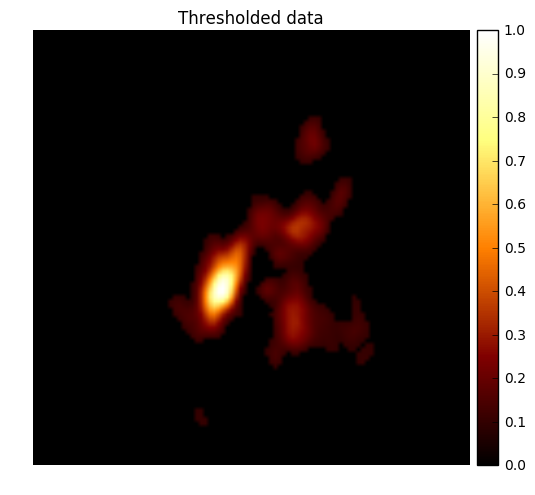

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=(base_level, 1.))

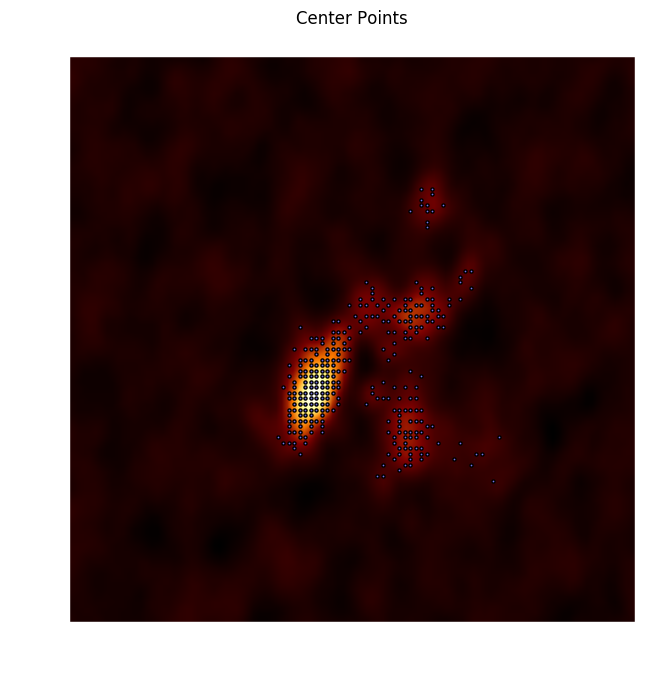

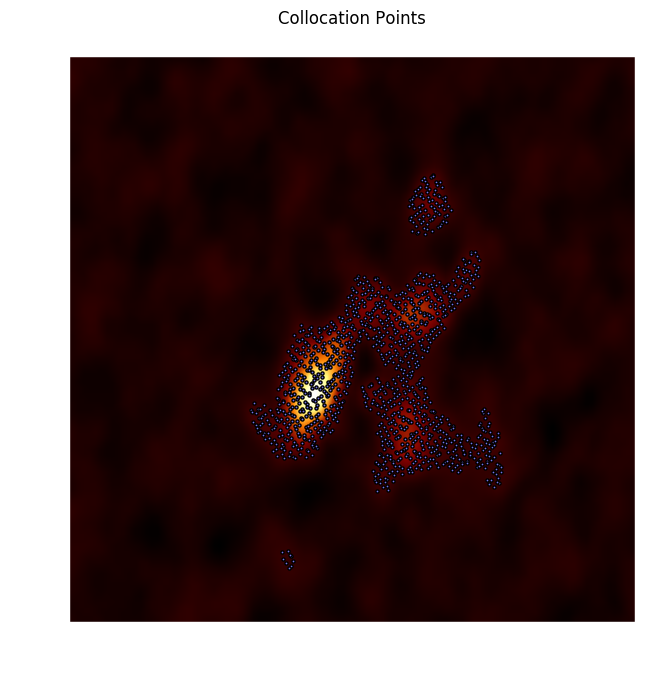

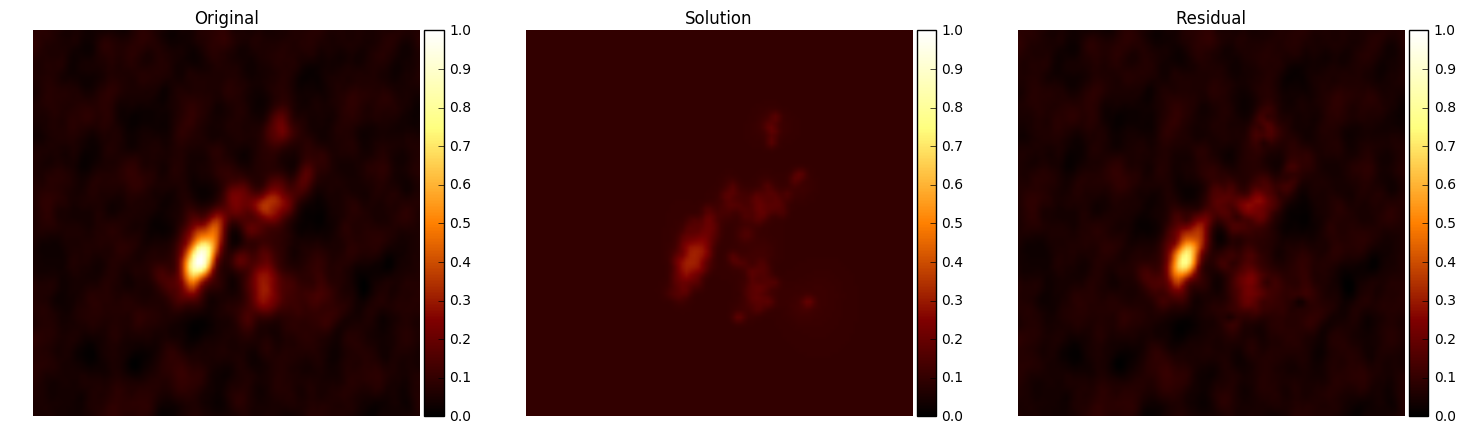

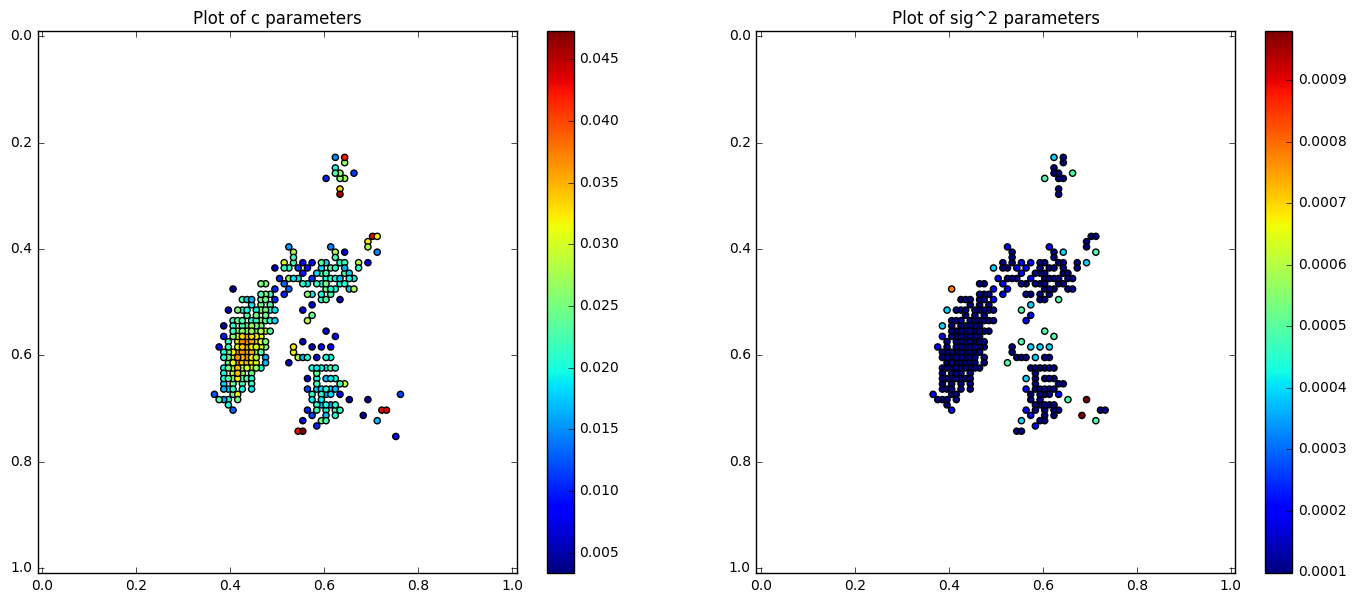

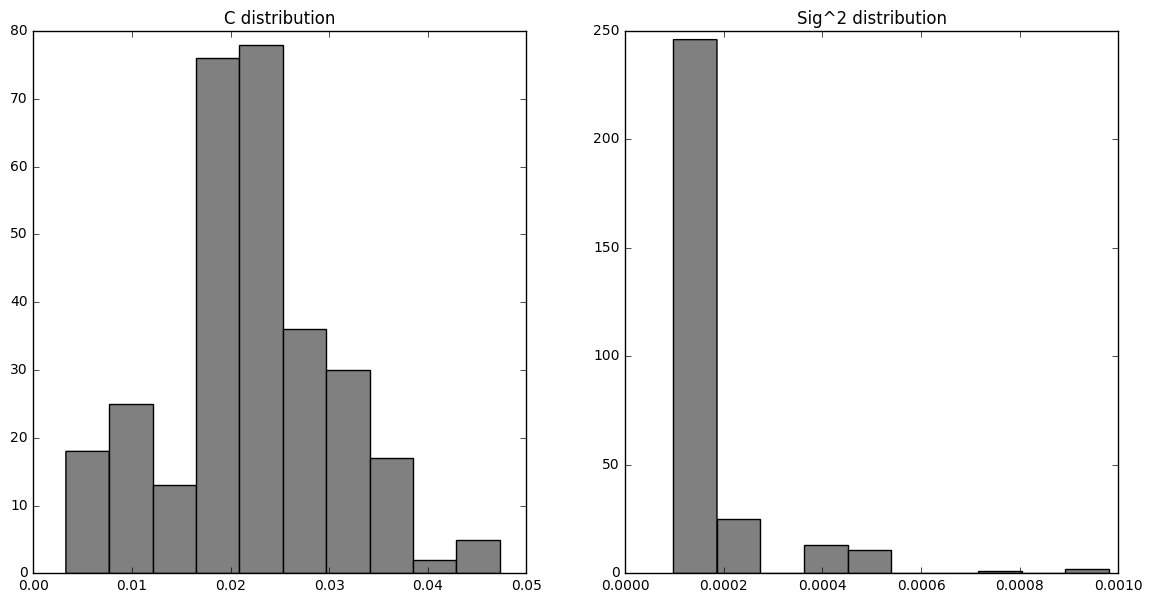

In [4]:
##########################################
# Approach 1
##########################################

# number of points of each type
Nb = 0
Nc = 300
Ne = 4*Nc-4*Nb

center_points = random_centers_generation(data, Nc, base_level=base_level, power=7.)
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)


# right format
xc = center_points[:,0]; yc = center_points[:,1]
xe = collocation_points[:,0]; ye = collocation_points[:,1]
xb = boundary_points[:,0]; yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm01 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100000.
nfev: 100894

Residual stats:
Residual RMS: 0.101092550394
Residual Variance: 1.93584948911e-05
Residual Entropy: 7.11803906737
Total elapsed time: 392.521701097 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.207740930811
Mean min distance between collocation and center points: 0.0118005368251

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.0683397315792
Max min distance in the (standarized) parameters space: 0.445235334026


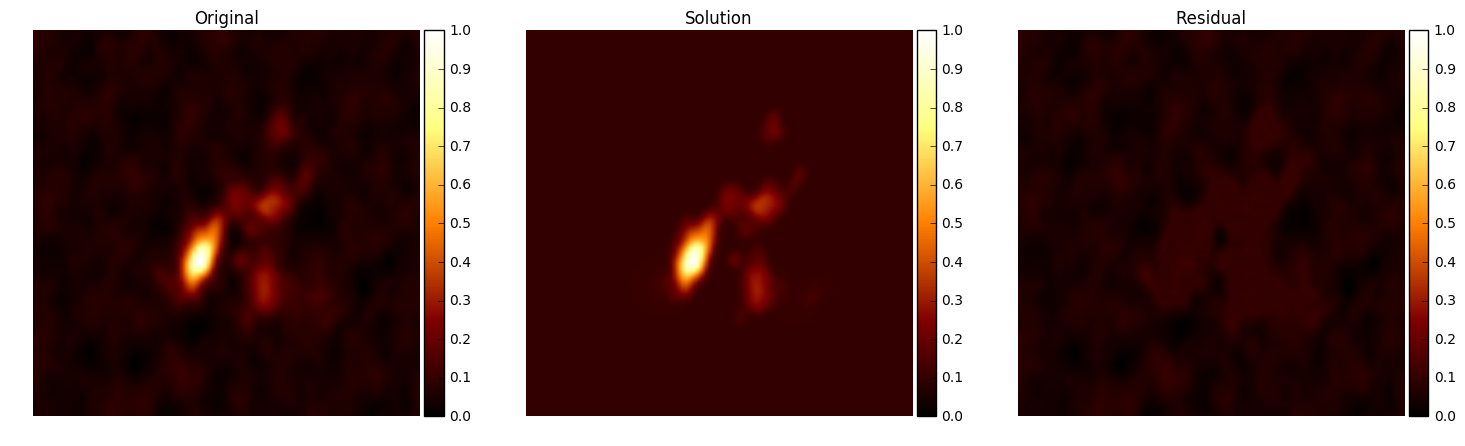

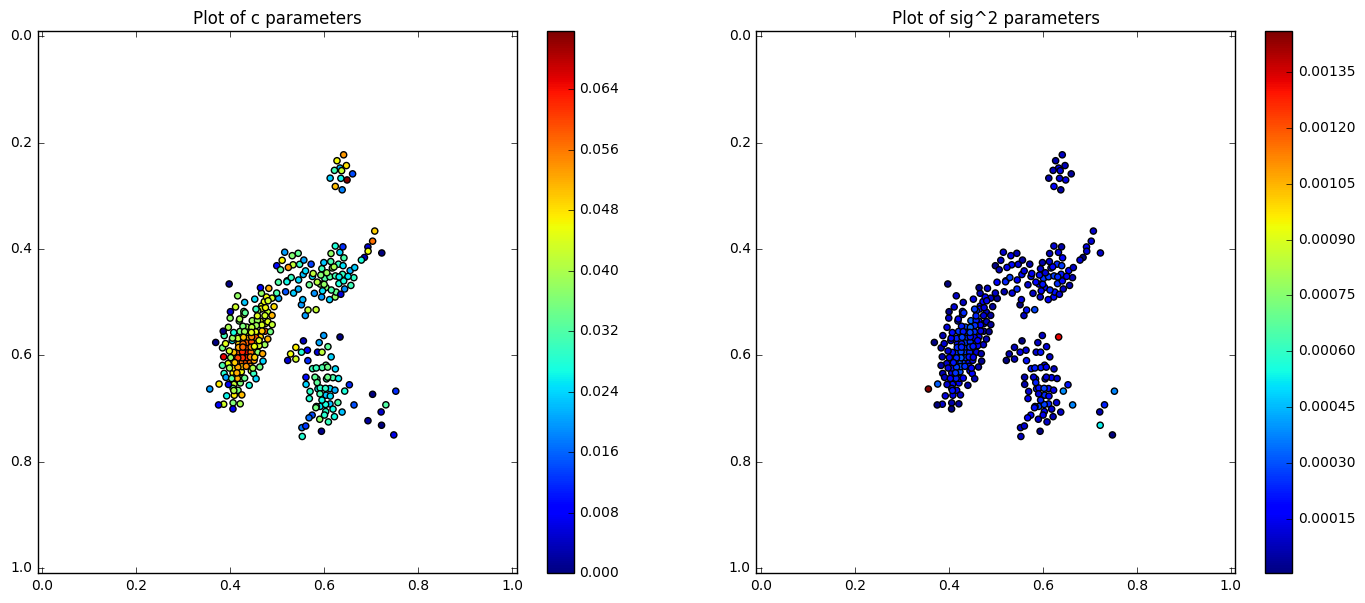

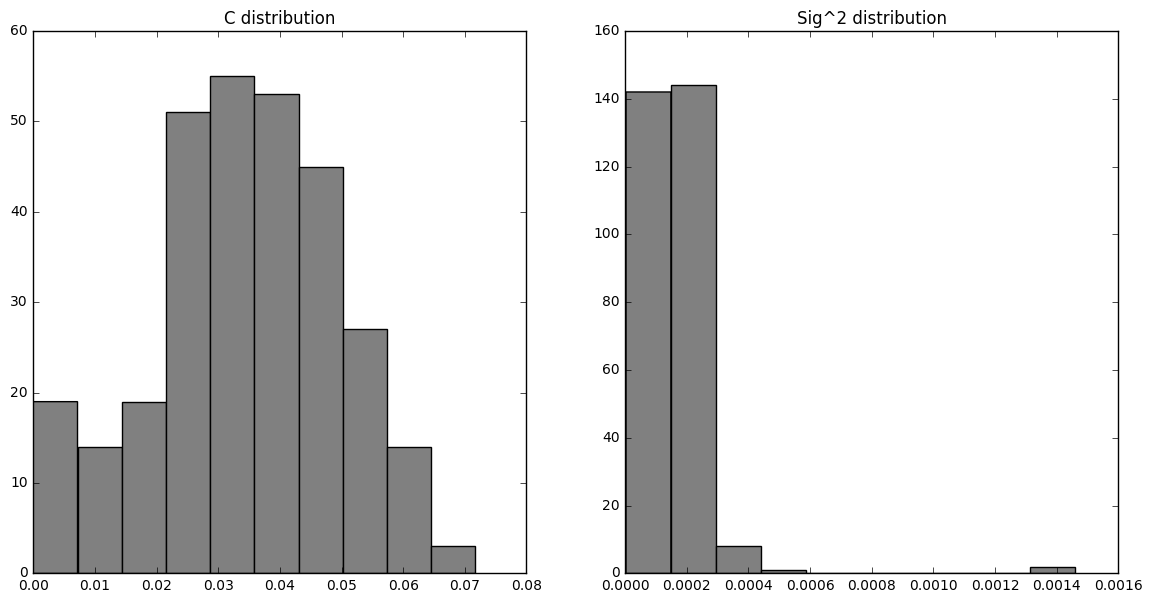

In [5]:
elm_solver(elm01, method='standard', max_nfev=100000)

In [6]:
# gaussian agglomeration
xc, yc, c, sig = elm01.get_params_mapped()
mu = np.vstack([xc, yc]).T

components_dict01 = gaussian_reduction(c, mu, sig, n_comp=1)

Merged components 209 and 294 with 1.20878908156e-13 dissimilarity
Merged components 171 and 284 with 8.32312668977e-07 dissimilarity
Merged components 263 and 285 with 2.00080404348e-06 dissimilarity
Merged components 292 and 293 with 4.41327954371e-06 dissimilarity
Merged components 292 and 295 with 4.41679816801e-05 dissimilarity
Merged components 182 and 220 with 0.000157165605029 dissimilarity
Merged components 165 and 249 with 0.000782105570875 dissimilarity
Merged components 66 and 68 with 0.000800624881542 dissimilarity
Merged components 64 and 190 with 0.000818315796356 dissimilarity
Merged components 91 and 110 with 0.000853353848329 dissimilarity
Merged components 34 and 165 with 0.000922999231614 dissimilarity
Merged components 57 and 119 with 0.00101251954016 dissimilarity
Merged components 103 and 172 with 0.00109408636466 dissimilarity
Merged components 190 and 276 with 0.00145565978323 dissimilarity
Merged components 68 and 153 with 0.00146167918573 dissimilarity
Merged

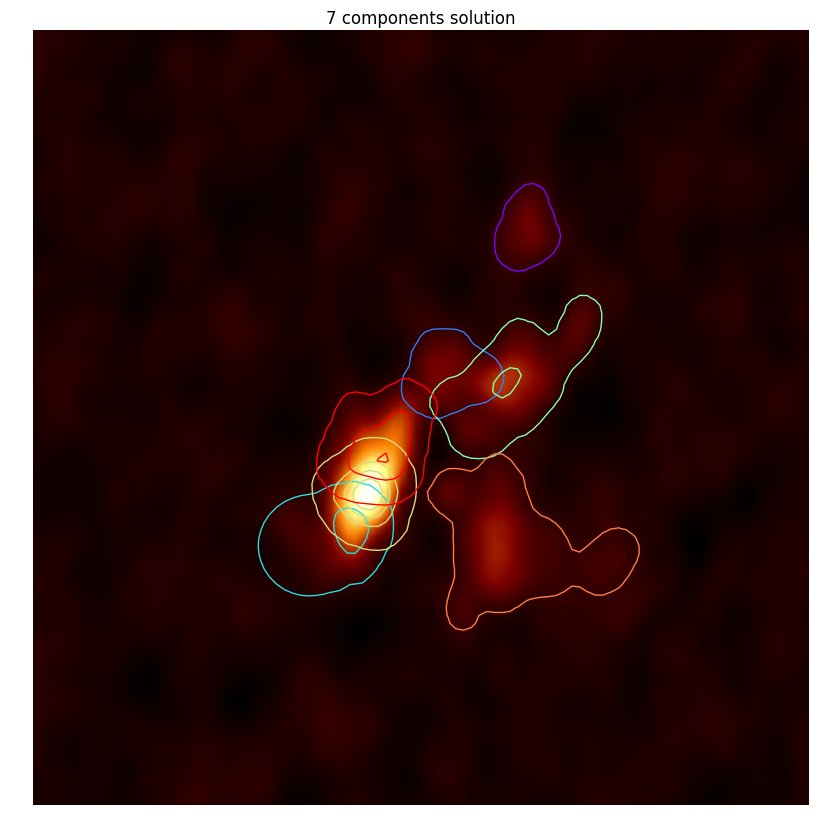

In [7]:
interact(components_plot, elm=fixed(elm01), data=fixed(data), components_dict=fixed(components_dict01), n_comp=(1,20), dims=fixed(data.shape), resolution=fixed(1), n_levels=fixed(5))

# `M100_combine_CO_cube.image.mom0.pbcor`

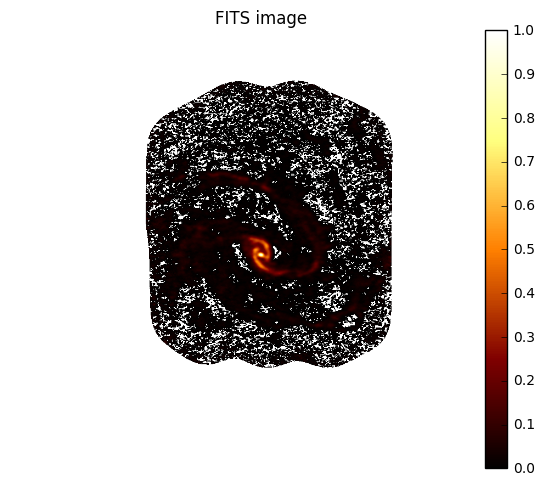

In [127]:
fits_path = '../data/images/M100_combine_CO_cube.image.mom0.pbcor.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

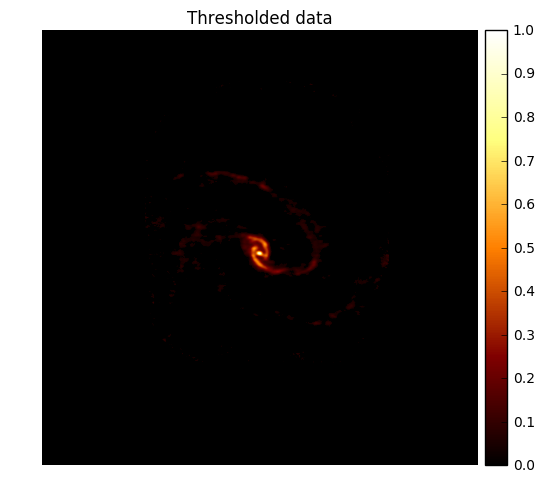

In [128]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=(base_level, 1.))

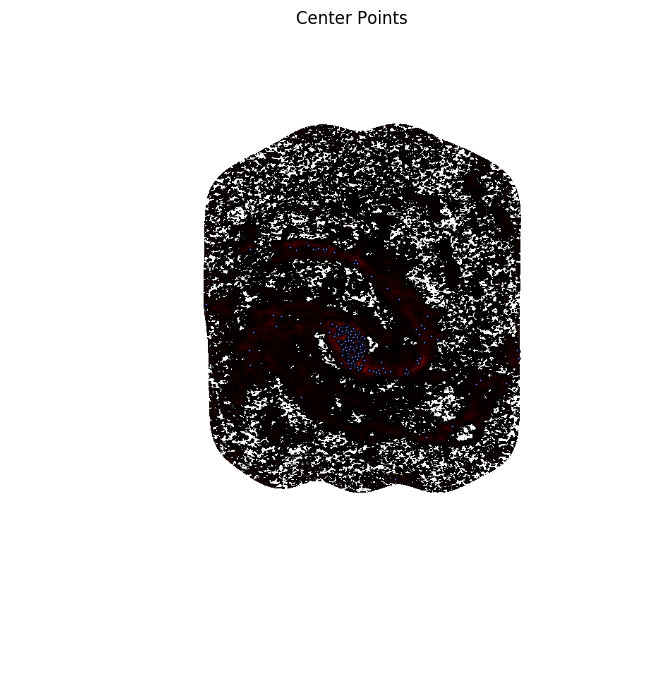

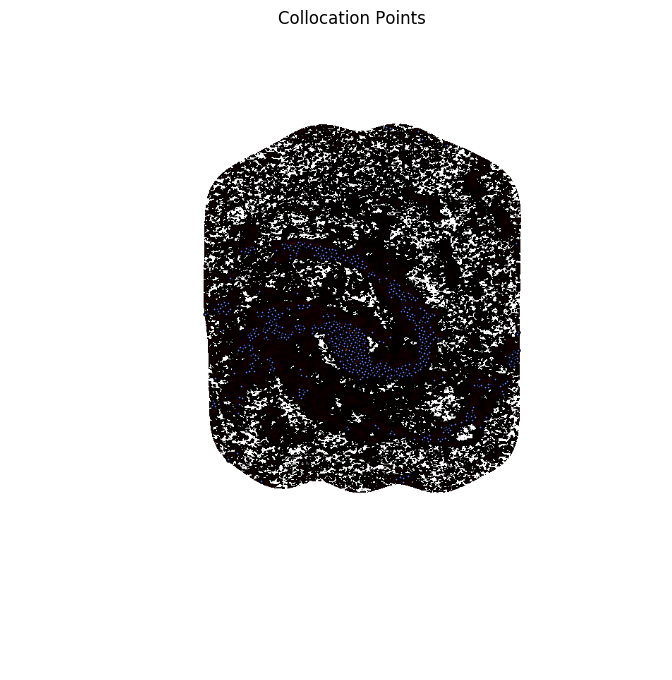

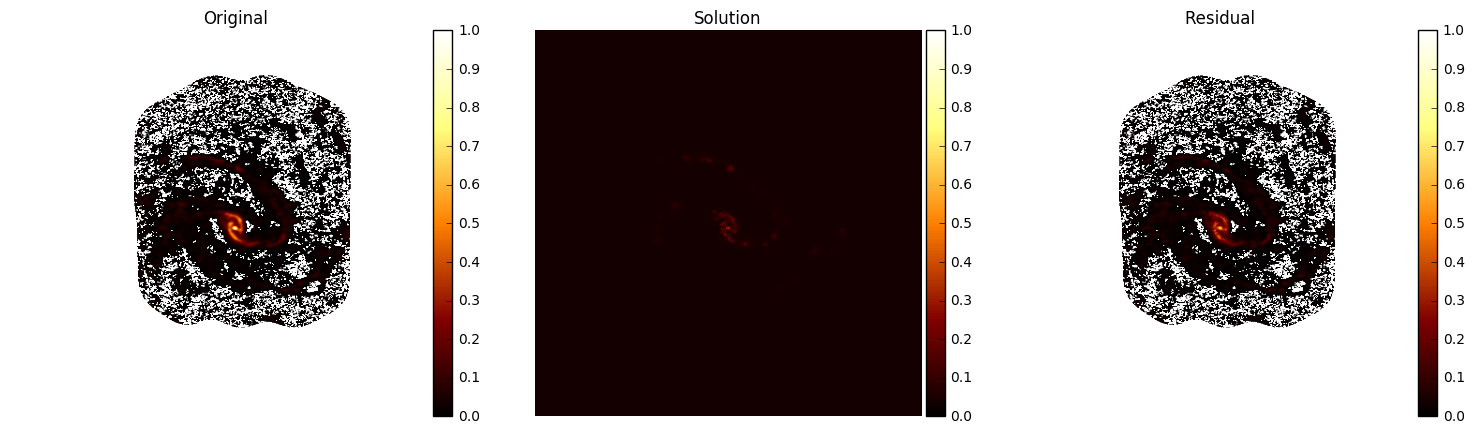

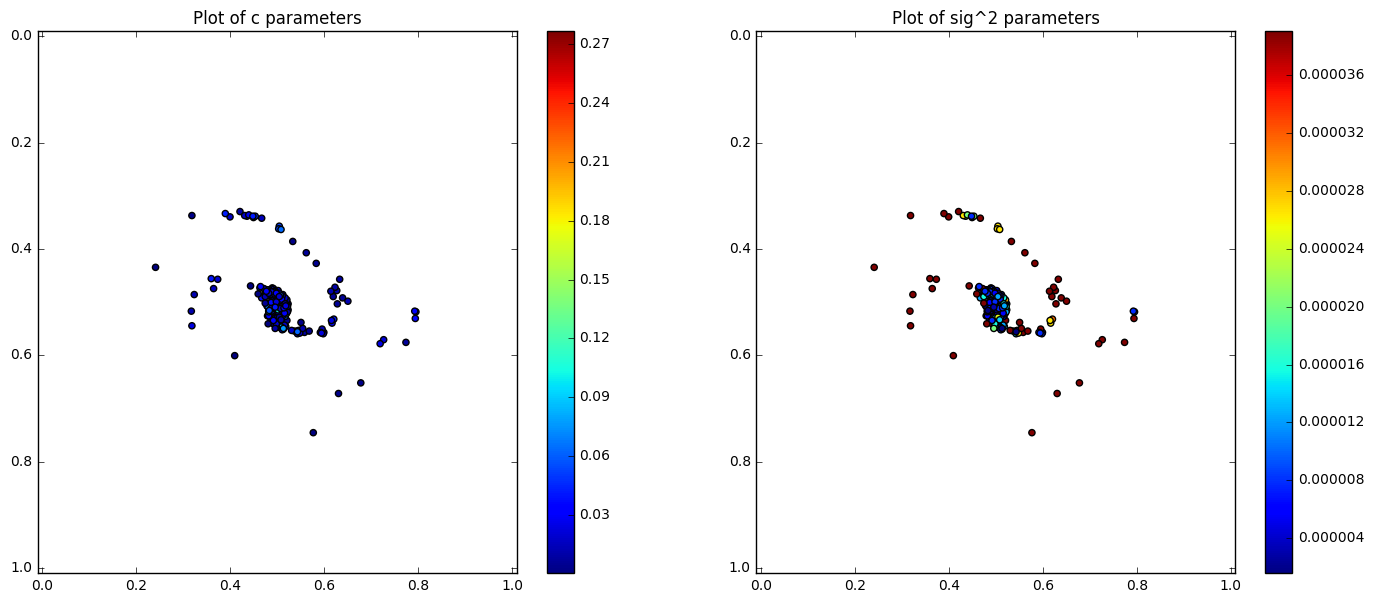

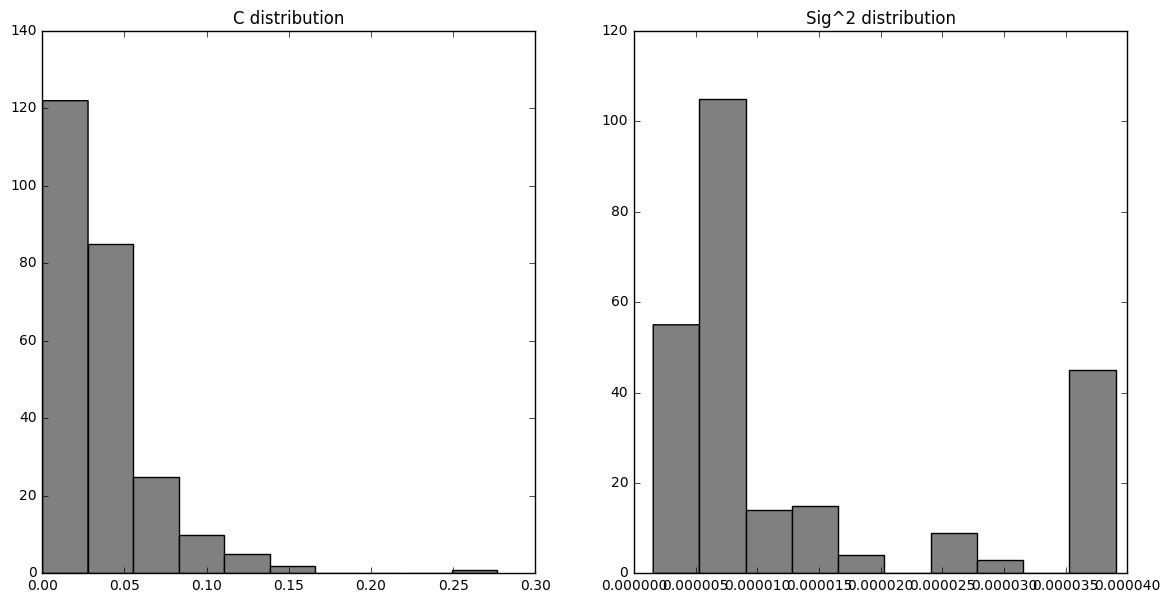

In [131]:
##########################################
# Approach 1
##########################################

# number of points of each type
Nb = 0
Nc = 250
Ne = 4*Nc-4*Nb

center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
#points = qrandom_centers_generation(dfunc, Nc+Ne, base_level, ndim=2)
#center_points = points[0:Nc]
#collocation_points = points[Nc:Nc+Ne]
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)


# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm01 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

../lib/utils.py:147: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))



 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:

success: False

status: 5

message: Number of calls to function has reached maxfev = 100000.

nfev: 100112
Residual RMS: 0.0515990849615
Residual Variance: 0.00045074454527
Residual Entropy: 4.49094410706
Total elapsed time: 216.236558199 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.263044135147
Mean min distance between collocation and center points: 0.0142715253432


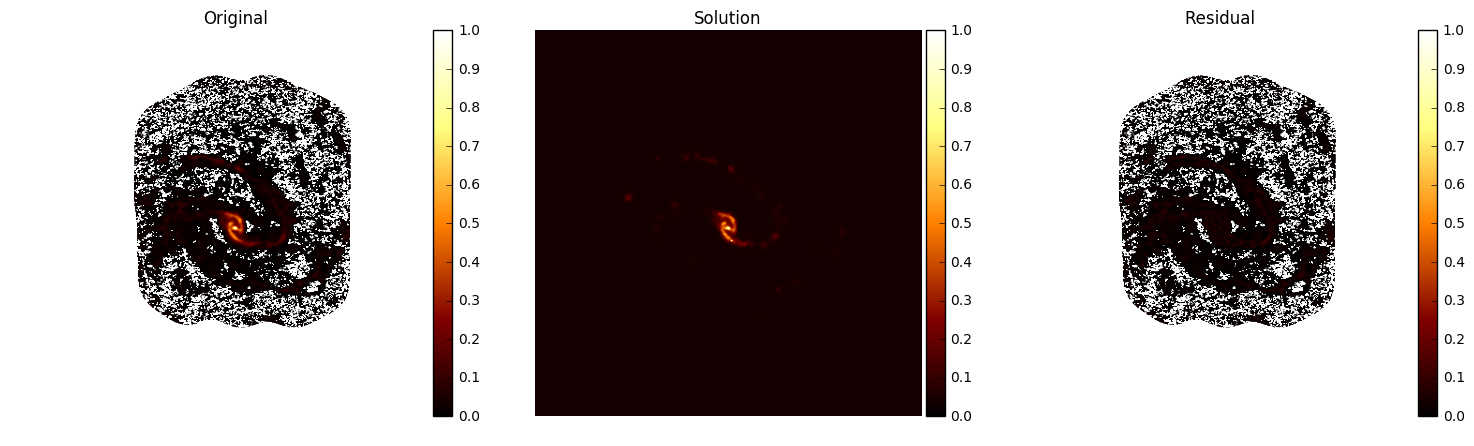

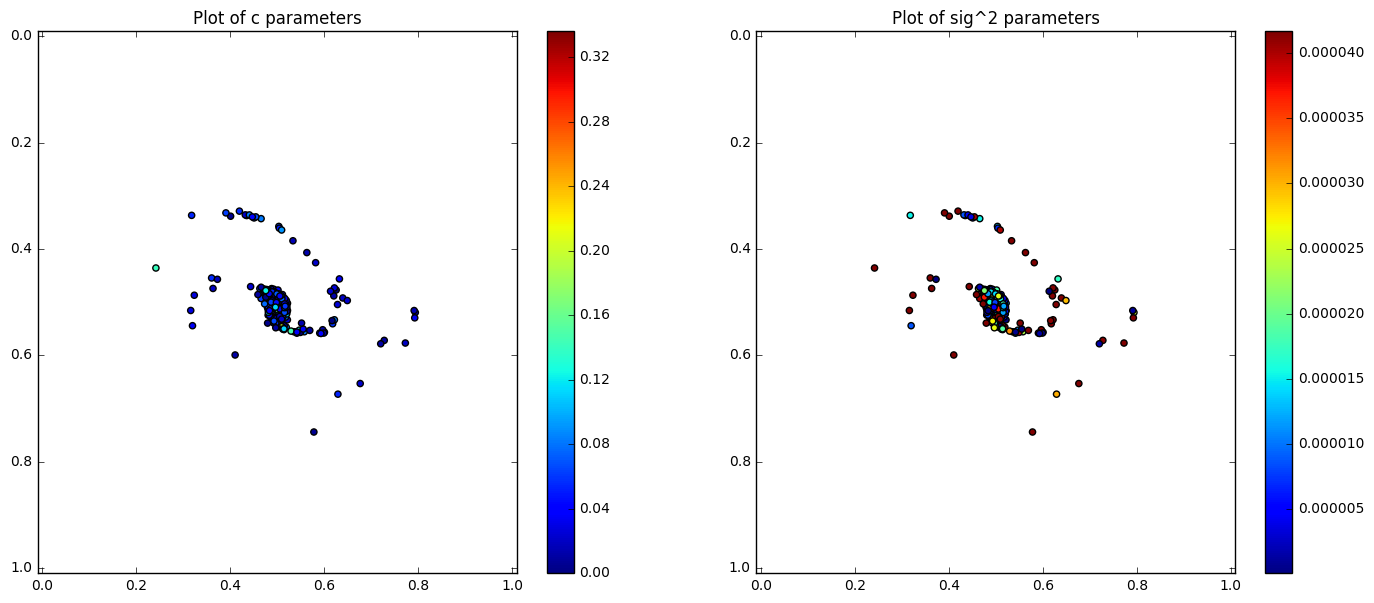

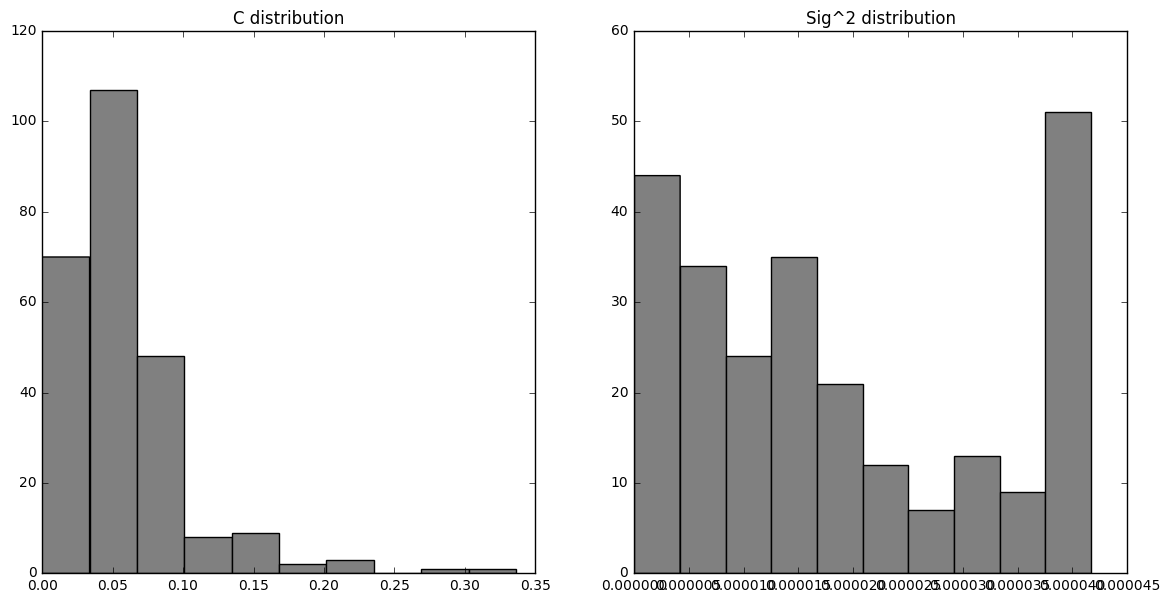

In [132]:
elm_solver(elm01, method='standard', max_nfev=100000)

In [133]:
# gaussian agglomeration
xc, yc, c, sig = elm01.get_params_mapped()
mu = np.vstack([xc, yc]).T

components_dict01 = gaussian_reduction(c, mu, sig, n_comp=1)

Merged components 168 and 194 with 2.08297888792e-12 dissimilarity
Merged components 47 and 69 with 2.08142243829e-07 dissimilarity
Merged components 102 and 127 with 5.02523599212e-05 dissimilarity
Merged components 63 and 216 with 0.000798695928956 dissimilarity
Merged components 103 and 179 with 0.000920010933304 dissimilarity
Merged components 18 and 234 with 0.00107124146163 dissimilarity
Merged components 72 and 86 with 0.00152211591276 dissimilarity
Merged components 56 and 175 with 0.00154508239535 dissimilarity
Merged components 23 and 209 with 0.00163559529825 dissimilarity
Merged components 157 and 178 with 0.00164443746269 dissimilarity
Merged components 52 and 59 with 0.00204196279957 dissimilarity
Merged components 88 and 142 with 0.0024518128134 dissimilarity
Merged components 96 and 109 with 0.00257525696031 dissimilarity
Merged components 97 and 148 with 0.00265177313512 dissimilarity
Merged components 94 and 119 with 0.00271935246387 dissimilarity
Merged components 18

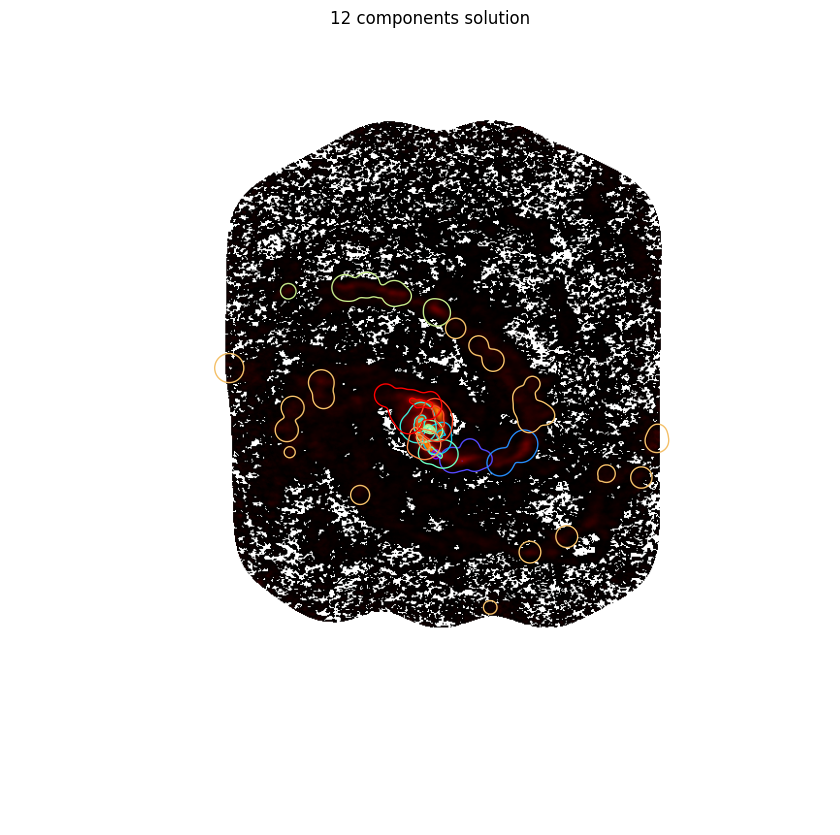

In [134]:
interact(components_plot, elm=fixed(elm01), data=fixed(data), components_dict=fixed(components_dict01), n_comp=(1,20), dims=fixed(data.shape), resolution=fixed(1), n_levels=fixed(5))

# `SDP81_band7_11exec.contR1.image`

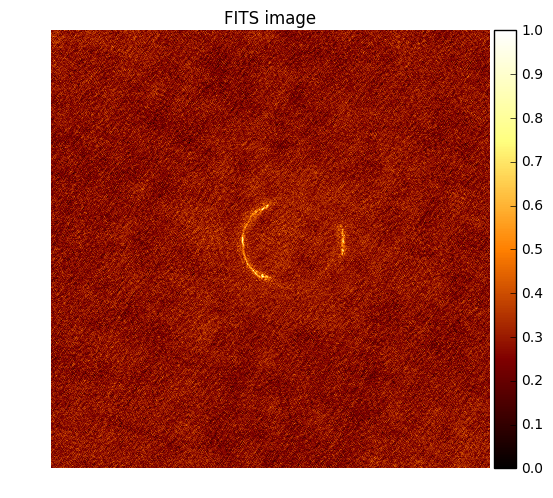

In [125]:
fits_path = "../data/images/SDP81_band7_11exec.contR1.image.fits"
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

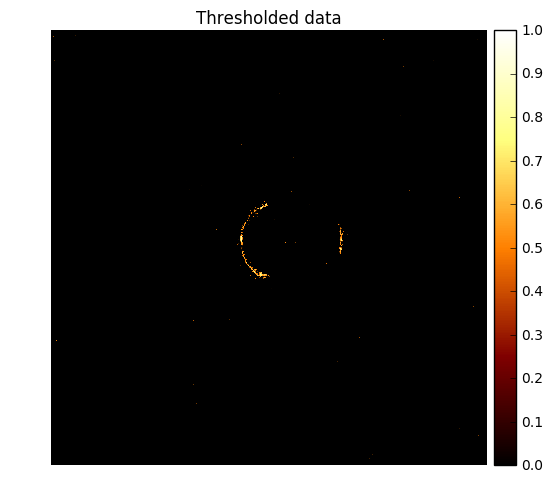

In [108]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=(base_level, 1.))

# `VYCMa_658_contap4.clean.fits`

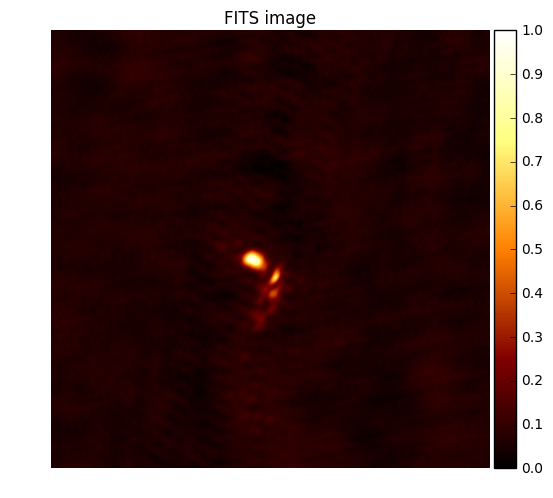

In [109]:
fits_path = "../data/images/VYCMa_658_contap4.clean.fits"
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

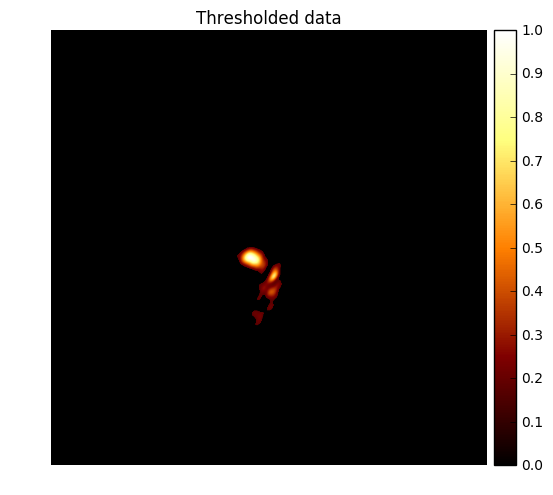

In [110]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=(base_level, 1.))

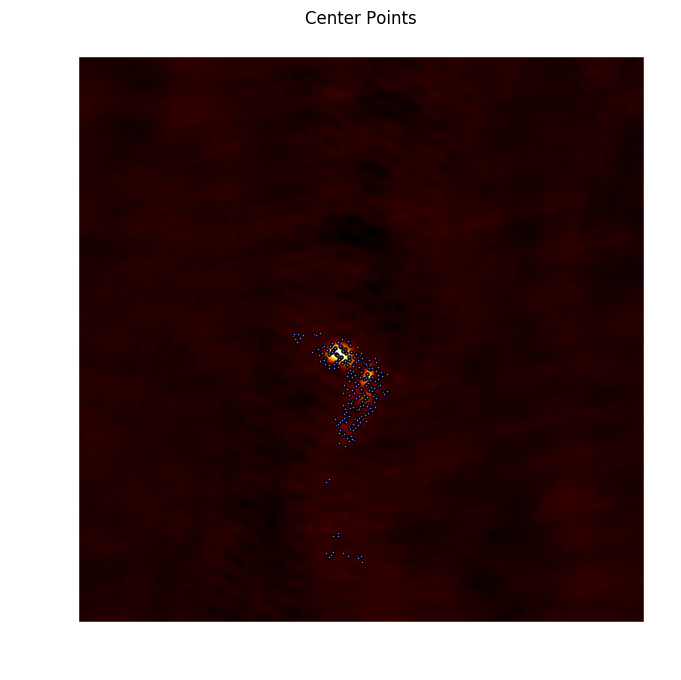

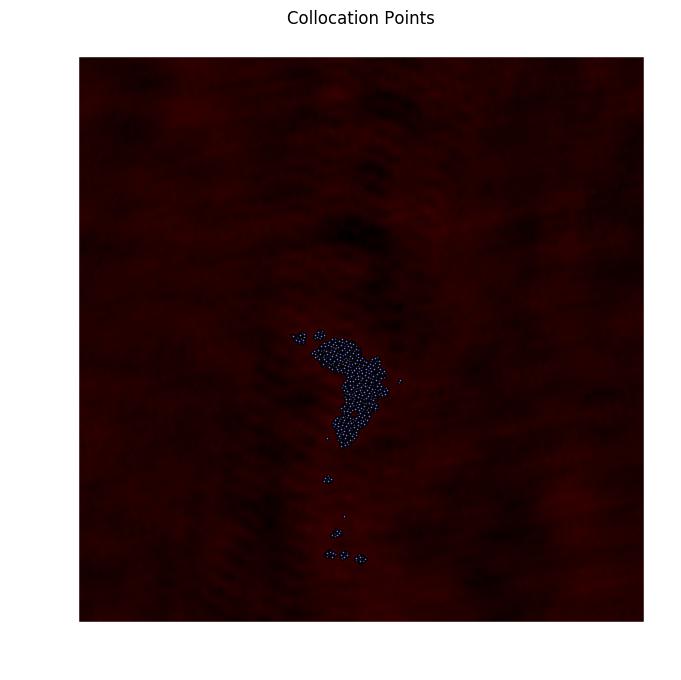

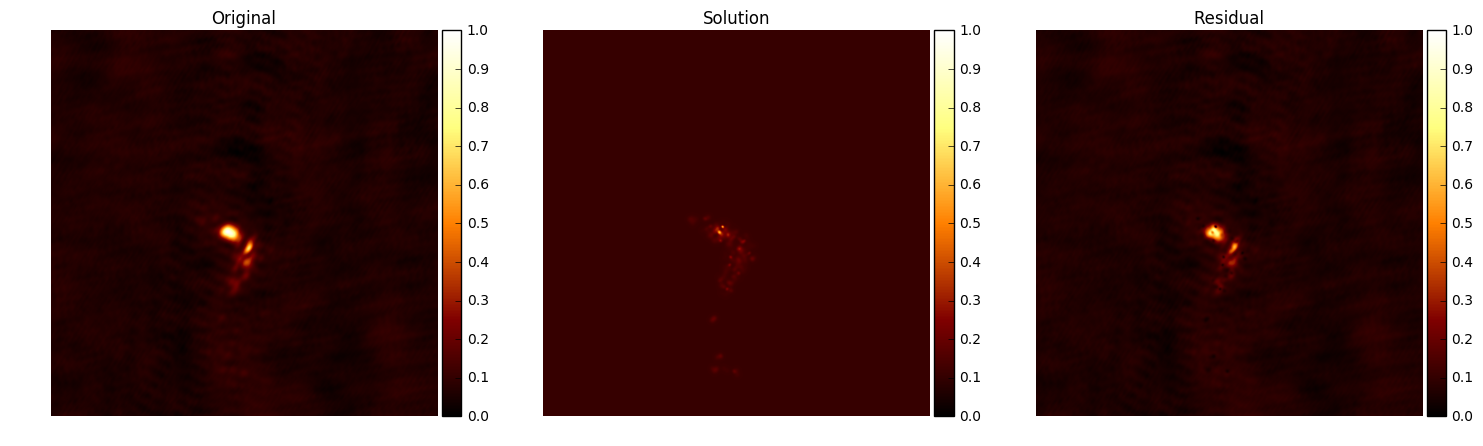

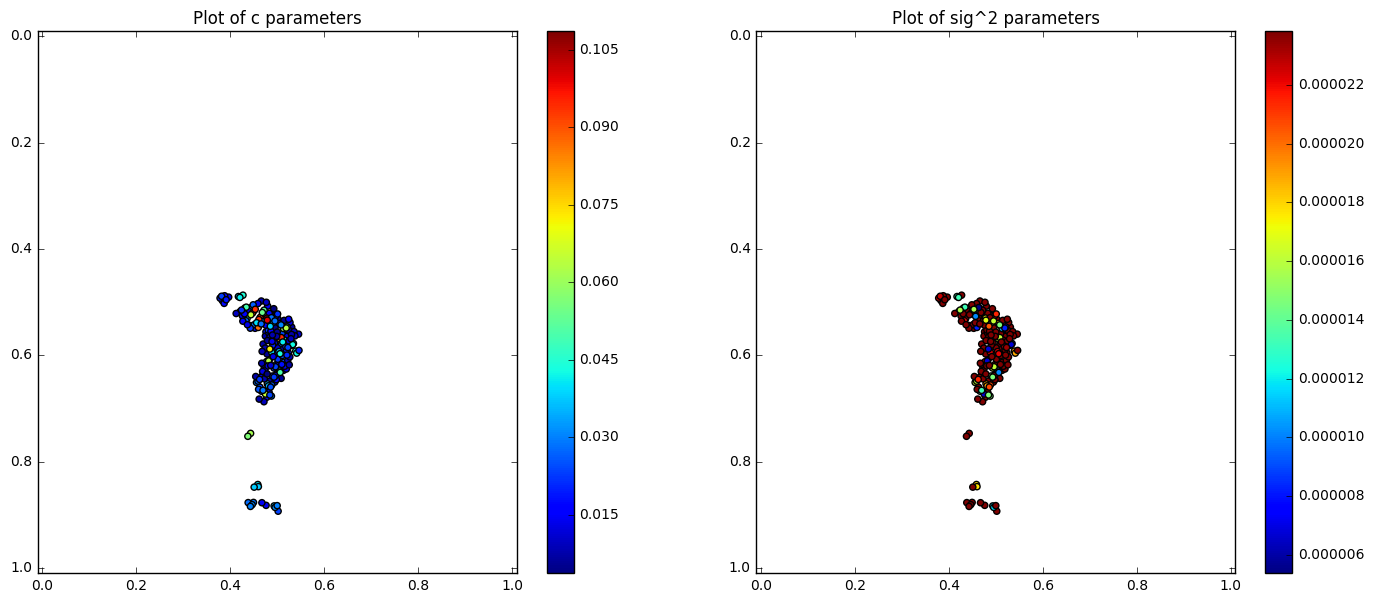

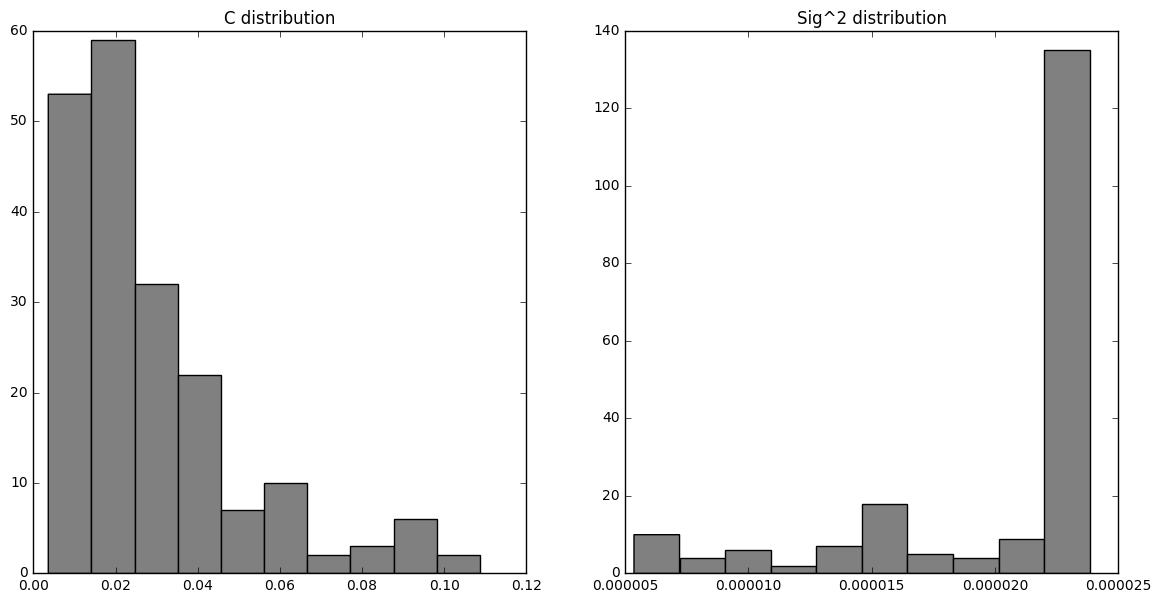

In [60]:
##########################################
# Approach 1
##########################################

# number of points of each type
Nb = 0
Nc = 200
Ne = 4*Nc-4*Nb

#center_points = random_centers_generation(data, Nc, base_level=base_level, power=7.)
points = qrandom_centers_generation(dfunc, Nc+Ne, base_level, ndim=2)
center_points = points[0:Nc]
collocation_points = points[Nc:Nc+Ne]
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm01 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

elm02 = copy.deepcopy(elm01)


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:

success: False

status: 5

message: Number of calls to function has reached maxfev = 100000.

nfev: 100133
Residual RMS: 0.113267272226
Residual Variance: 0.000467829333295
Residual Entropy: 5.6981495862
Total elapsed time: 129.681695938 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0314696271408
Mean min distance between collocation and center points: 0.00397010192153


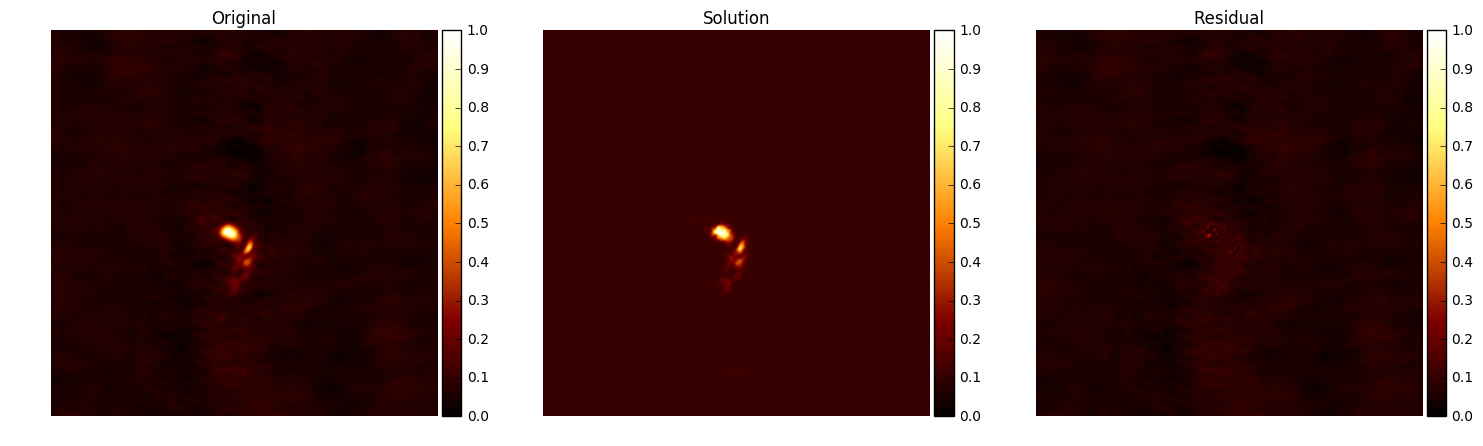

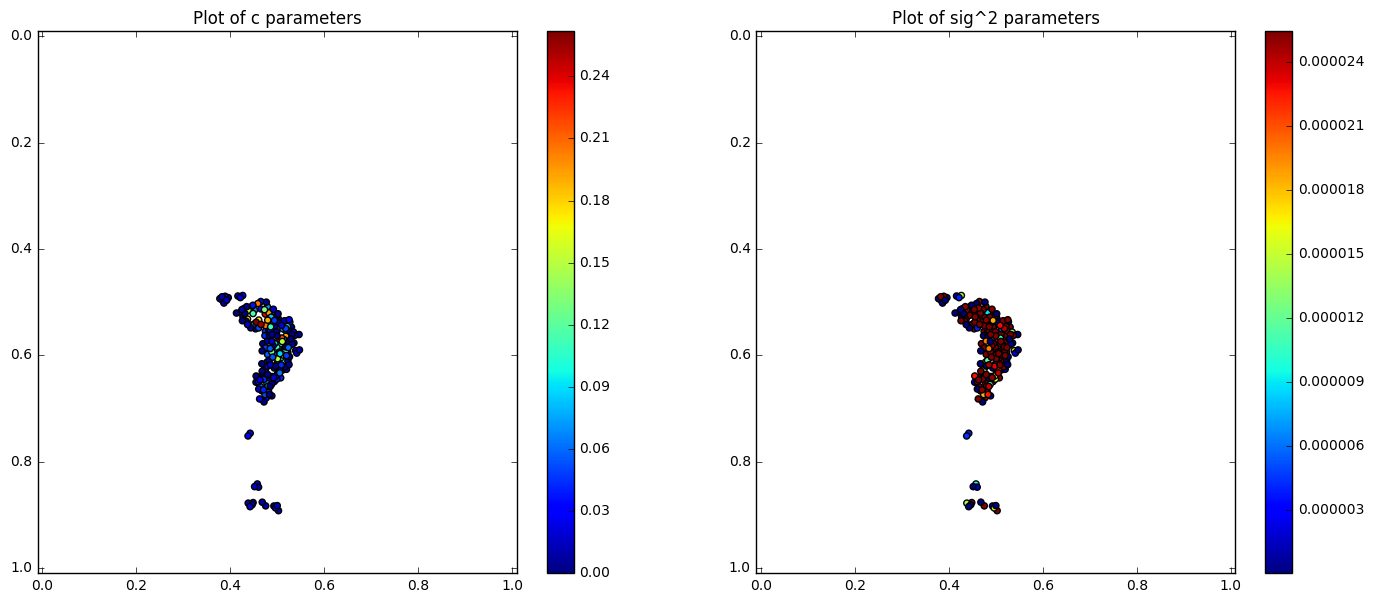

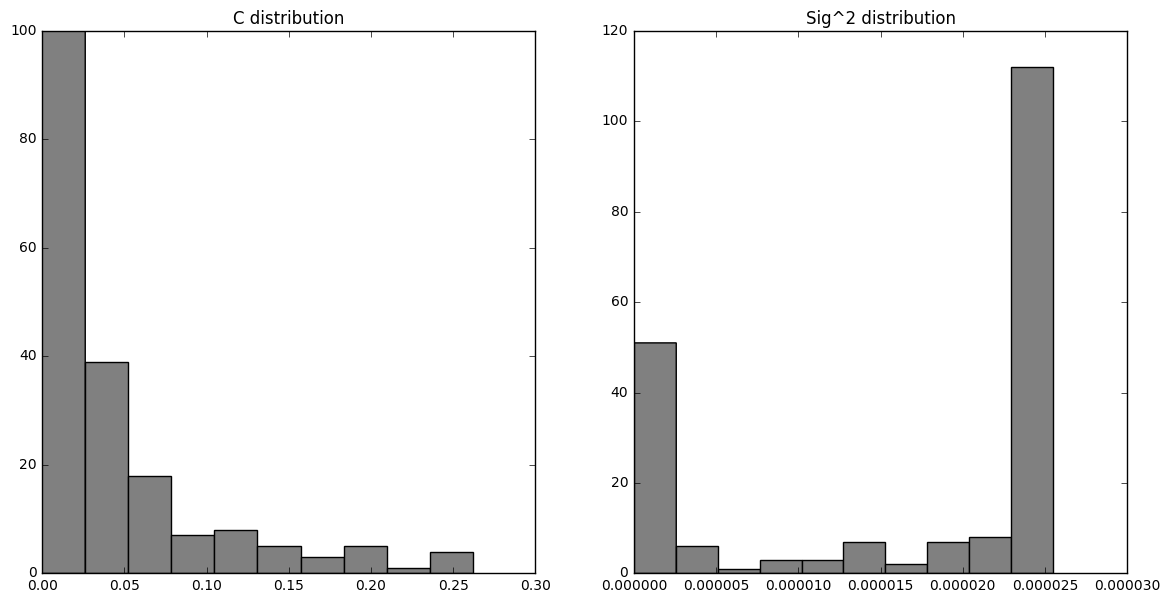

In [61]:
elm_solver(elm01, method='standard', max_nfev=100000)

In [63]:
# gaussian agglomeration
xc, yc, c, sig = elm01.get_params_mapped()
mu = np.vstack([xc, yc]).T

components_dict01 = gaussian_reduction(c, mu, sig, n_comp=1)

Merged components 74 and 147 with 1.1945999745e-13 dissimilarity
Merged components 0 and 50 with 3.78003184309e-13 dissimilarity
Merged components 126 and 175 with 1.19844168572e-11 dissimilarity
Merged components 82 and 129 with 2.39503555644e-11 dissimilarity
Merged components 45 and 194 with 2.704209253e-11 dissimilarity
Merged components 78 and 146 with 4.24382806656e-11 dissimilarity
Merged components 134 and 157 with 3.06335989499e-10 dissimilarity
Merged components 97 and 116 with 3.14559509226e-10 dissimilarity
Merged components 30 and 187 with 1.4029385872e-09 dissimilarity
Merged components 172 and 186 with 2.44463481708e-09 dissimilarity
Merged components 92 and 178 with 4.09729766782e-09 dissimilarity
Merged components 42 and 129 with 1.22696943924e-08 dissimilarity
Merged components 16 and 137 with 2.55269123567e-06 dissimilarity
Merged components 76 and 169 with 2.81120734703e-06 dissimilarity
Merged components 40 and 72 with 3.62900710219e-06 dissimilarity
Merged compone

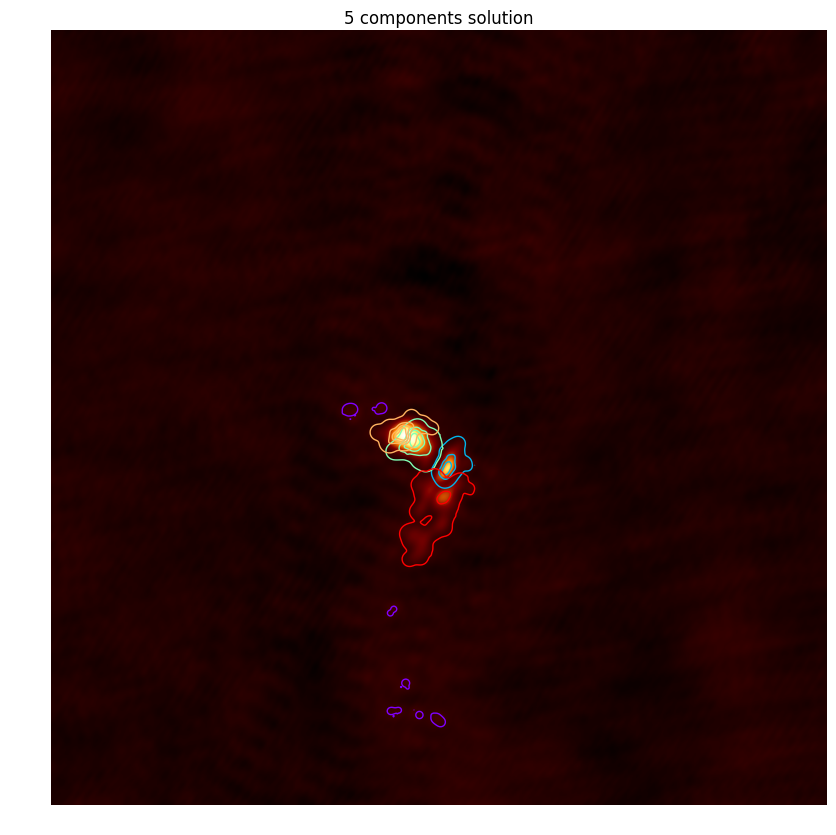

In [64]:
interact(components_plot, elm=fixed(elm01), data=fixed(data), components_dict=fixed(components_dict01), n_comp=(1,20), dims=fixed(data.shape), resolution=fixed(1), n_levels=fixed(5))

***
***

# `calibrated_final_cont_image.image`

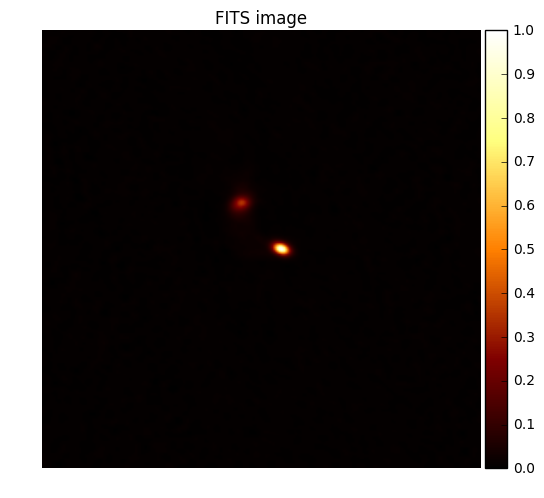

In [111]:
fits_path = "../data/images/calibrated_final_cont_image.image.fits"
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

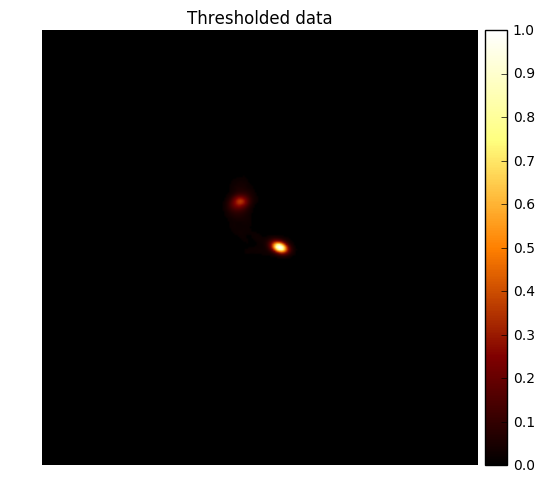

In [112]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=(base_level, 1.))

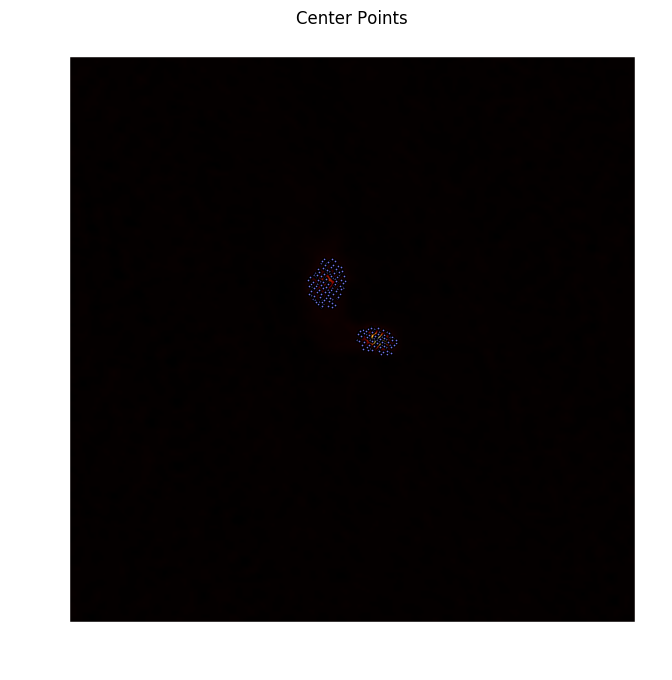

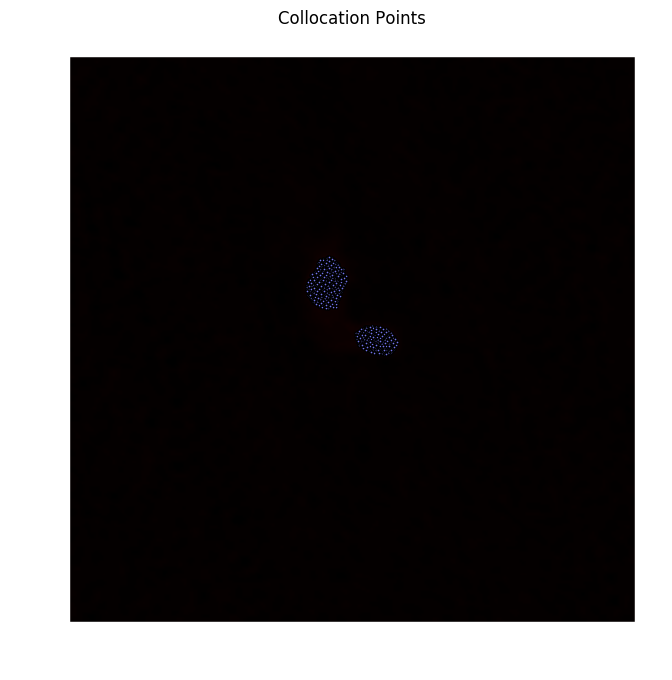

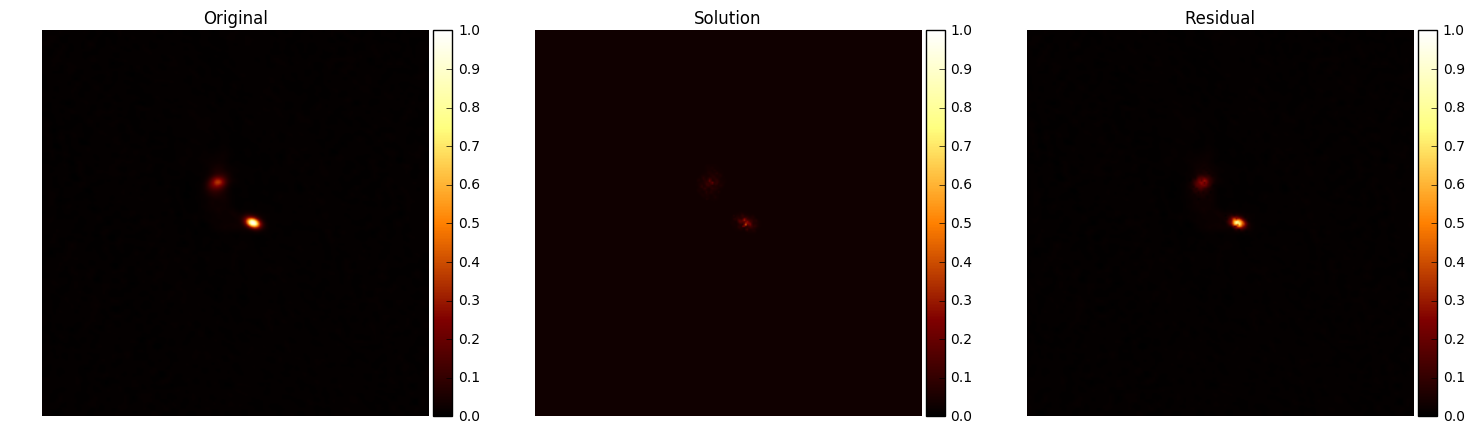

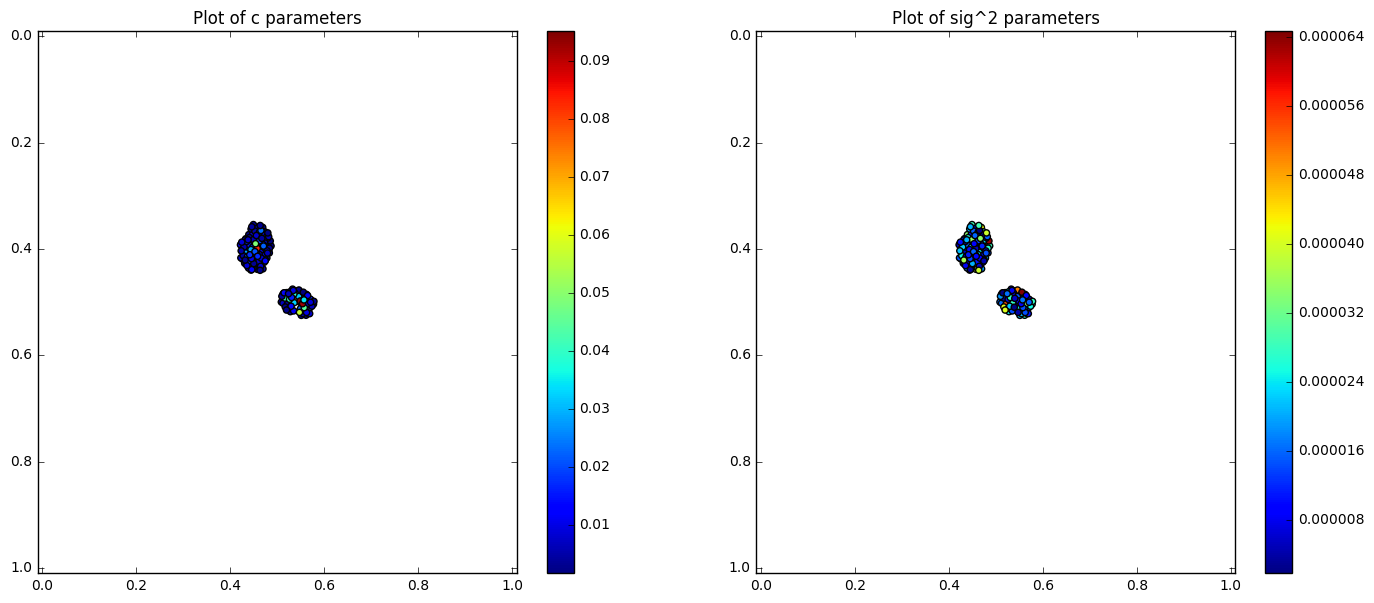

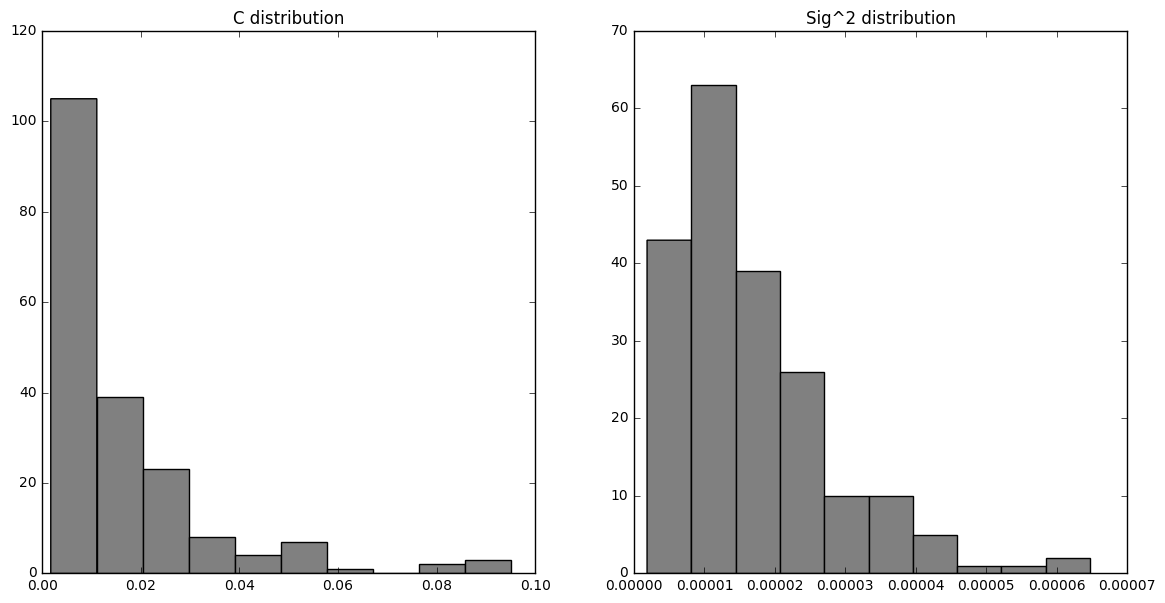

In [ ]:
##########################################
# Approach 1
##########################################

# number of points of each type
Nb = 0
Nc = 200
Ne = 4*Nc-4*Nb

#center_points = random_centers_generation(data, Nc, base_level=base_level, power=7.)
points = qrandom_centers_generation(dfunc, Nc+Ne, base_level, ndim=2)
center_points = points[0:Nc]
collocation_points = points[Nc:Nc+Ne]
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm01 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

elm02 = copy.deepcopy(elm01)

In [ ]:
elm_solver(elm01, method='standard', max_nfev=100000)

***
***

# `CenA.Cont.Clean.image`

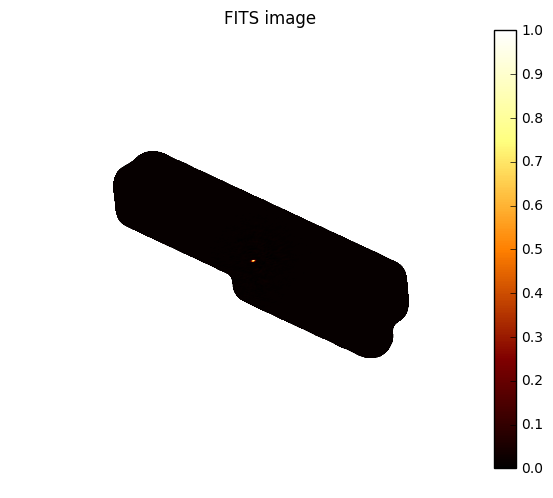

In [114]:
fits_path = '../data/images/CenA.Cont.Clean.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [115]:
data.shape

(1296, 1296)